In [2]:
# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
from sklearn.datasets import load_breast_cancer, make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load datasets
X_class, y_class = load_breast_cancer(return_X_y=True)
X_reg, y_reg = make_regression(n_samples=500, n_features=10, noise=0.3, random_state=42)

# Split datasets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 1. Bagging Classifier with Decision Trees
bc = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bc.fit(Xc_train, yc_train)
print("1. Bagging Classifier Accuracy:", accuracy_score(yc_test, bc.predict(Xc_test)))


1. Bagging Classifier Accuracy: 0.9473684210526315


In [4]:
# 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
br = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
br.fit(Xr_train, yr_train)
print("2. Bagging Regressor MSE:", mean_squared_error(yr_test, br.predict(Xr_test)))


2. Bagging Regressor MSE: 6243.756669557429


In [5]:
# 3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
print("3. Random Forest Feature Importances:", rfc.feature_importances_)


3. Random Forest Feature Importances: [0.03231189 0.0110639  0.06009233 0.05381045 0.00622336 0.00921566
 0.08055702 0.14193444 0.00327807 0.00314028 0.01643496 0.00317191
 0.01176976 0.02953842 0.00588079 0.00459638 0.0058159  0.00338232
 0.00400077 0.00713457 0.07797475 0.01878567 0.07429212 0.11821686
 0.01176917 0.01753909 0.04107958 0.12713638 0.01292945 0.00692376]


In [6]:
# 4. Train a Random Forest Regressor and compare its performance with a single Decision Tree.
rfr = RandomForestRegressor(random_state=42)
rfr.fit(Xr_train, yr_train)
rfr_mse = mean_squared_error(yr_test, rfr.predict(Xr_test))

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(Xr_train, yr_train)
dt_mse = mean_squared_error(yr_test, dt_reg.predict(Xr_test))
print("4. Random Forest Regressor MSE:", rfr_mse)
print("   Decision Tree Regressor MSE:", dt_mse)


4. Random Forest Regressor MSE: 4427.3022663481715
   Decision Tree Regressor MSE: 12354.062819518691


In [7]:
# 5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
rfc_oob = RandomForestClassifier(oob_score=True, bootstrap=True, random_state=42)
rfc_oob.fit(Xc_train, yc_train)
print("5. OOB Score (Random Forest):", rfc_oob.oob_score_)


5. OOB Score (Random Forest): 0.9547738693467337


In [9]:
# 6. Train a Bagging Classifier using SVM as a base estimator and print accuracy.
bc_svm = BaggingClassifier(estimator=SVC(probability=True), random_state=42)
bc_svm.fit(Xc_train, yc_train)
print("6. Bagging Classifier with SVM Accuracy:", accuracy_score(yc_test, bc_svm.predict(Xc_test)))


6. Bagging Classifier with SVM Accuracy: 0.9473684210526315


In [10]:
# 7. Train a Random Forest Classifier with different numbers of trees and compare accuracy.
for n in [10, 50, 100]:
    rfc_n = RandomForestClassifier(n_estimators=n, random_state=42)
    rfc_n.fit(Xc_train, yc_train)
    acc = accuracy_score(yc_test, rfc_n.predict(Xc_test))
    print(f"7. Random Forest ({n} Trees) Accuracy:", acc)


7. Random Forest (10 Trees) Accuracy: 0.9649122807017544
7. Random Forest (50 Trees) Accuracy: 0.9707602339181286
7. Random Forest (100 Trees) Accuracy: 0.9707602339181286


In [11]:
# 8. Train a Bagging Classifier using Logistic Regression and print AUC score.
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

bc_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=500, solver='liblinear'), random_state=42)
bc_lr.fit(Xc_train_scaled, yc_train)
probs = bc_lr.predict_proba(Xc_test_scaled)[:, 1]
print("8. Bagging Classifier with Logistic Regression AUC:", roc_auc_score(yc_test, probs))


8. Bagging Classifier with Logistic Regression AUC: 0.9976484420928865


In [12]:
# 9. Train a Random Forest Regressor and analyze feature importance scores.
rfr = RandomForestRegressor(random_state=42)
rfr.fit(Xr_train, yr_train)
print("9. Random Forest Regressor Feature Importances:", rfr.feature_importances_)


9. Random Forest Regressor Feature Importances: [0.09544177 0.1450734  0.02474749 0.08263147 0.02849455 0.01934172
 0.36507722 0.18023327 0.02042126 0.03853785]


In [13]:
# 10. Train an ensemble model using both Bagging and Random Forest and compare accuracy.
bc_ens = BaggingClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42)
bc_ens.fit(Xc_train, yc_train)
print("10. Ensemble (Bagging + Random Forest) Accuracy:", accuracy_score(yc_test, bc_ens.predict(Xc_test)))


10. Ensemble (Bagging + Random Forest) Accuracy: 0.9707602339181286


In [14]:
# 11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rfc.fit(Xc_train, yc_train)
print("11. Best Params (GridSearchCV):", grid_rfc.best_params_)
print("    Accuracy:", grid_rfc.score(Xc_test, yc_test))


11. Best Params (GridSearchCV): {'max_depth': None, 'n_estimators': 50}
    Accuracy: 0.9707602339181286


In [15]:
# 12. Train a Bagging Regressor with different numbers of base estimators and compare performance.
for n in [5, 10, 20]:
    br = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    br.fit(Xr_train, yr_train)
    mse = mean_squared_error(yr_test, br.predict(Xr_test))
    print(f"12. Bagging Regressor ({n} estimators) MSE:", mse)


12. Bagging Regressor (5 estimators) MSE: 7244.890667344914
12. Bagging Regressor (10 estimators) MSE: 6243.756669557429
12. Bagging Regressor (20 estimators) MSE: 5227.277164029636


In [16]:
# 13. Train a Random Forest Classifier and analyze misclassified samples.
rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
preds = rfc.predict(Xc_test)
misclassified_indices = np.where(preds != yc_test)[0]
print("13. Number of misclassified samples:", len(misclassified_indices))


13. Number of misclassified samples: 5


In [17]:
# 14. Train a Bagging Classifier and compare with a single Decision Tree Classifier.
bc = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bc.fit(Xc_train, yc_train)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xc_train, yc_train)
print("14. Bagging Accuracy:", accuracy_score(yc_test, bc.predict(Xc_test)))
print("    Single Decision Tree Accuracy:", accuracy_score(yc_test, dt.predict(Xc_test)))


14. Bagging Accuracy: 0.9473684210526315
    Single Decision Tree Accuracy: 0.9415204678362573


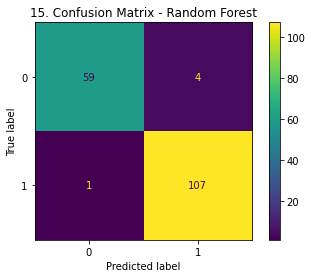

In [18]:
# 15. Train a Random Forest Classifier and visualize the confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
ConfusionMatrixDisplay.from_estimator(rfc, Xc_test, yc_test)
plt.title("15. Confusion Matrix - Random Forest")
plt.show()


In [19]:
# 16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression.
from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),
        ('lr', LogisticRegression(max_iter=500))
    ],
    final_estimator=LogisticRegression()
)
stack_model.fit(Xc_train, yc_train)
print("16. Stacking Classifier Accuracy:", accuracy_score(yc_test, stack_model.predict(Xc_test)))


16. Stacking Classifier Accuracy: 0.9824561403508771


In [20]:
# 17. Train a Random Forest Classifier and print the top 5 most important features.
rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
top_features = np.argsort(rfc.feature_importances_)[::-1][:5]
print("17. Top 5 Features (Indices):", top_features)
print("    Importances:", rfc.feature_importances_[top_features])


17. Top 5 Features (Indices): [ 7 27 23  6 20]
    Importances: [0.14193444 0.12713638 0.11821686 0.08055702 0.07797475]


In [21]:
# 18. Train a Bagging Classifier and evaluate Precision, Recall, F1-score.
from sklearn.metrics import precision_score, recall_score, f1_score

bc = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bc.fit(Xc_train, yc_train)
y_pred = bc.predict(Xc_test)
print("18. Precision:", precision_score(yc_test, y_pred))
print("    Recall:", recall_score(yc_test, y_pred))
print("    F1 Score:", f1_score(yc_test, y_pred))


18. Precision: 0.9626168224299065
    Recall: 0.9537037037037037
    F1 Score: 0.958139534883721


In [22]:
# 19. Train a Random Forest Classifier and analyze effect of max_depth on accuracy.
for depth in [2, 5, 10, None]:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(Xc_train, yc_train)
    acc = accuracy_score(yc_test, model.predict(Xc_test))
    print(f"19. max_depth={depth} -> Accuracy: {acc}")


19. max_depth=2 -> Accuracy: 0.9532163742690059
19. max_depth=5 -> Accuracy: 0.9649122807017544
19. max_depth=10 -> Accuracy: 0.9707602339181286
19. max_depth=None -> Accuracy: 0.9707602339181286


In [23]:
# 20. Train a Bagging Regressor with DecisionTree and KNeighbors, compare performance.
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    br = BaggingRegressor(estimator=base, random_state=42)
    br.fit(Xr_train, yr_train)
    pred = br.predict(Xr_test)
    mse = mean_squared_error(yr_test, pred)
    print(f"20. Base Estimator: {base.__class__.__name__} -> MSE: {mse}")


20. Base Estimator: DecisionTreeRegressor -> MSE: 6243.756669557429
20. Base Estimator: KNeighborsRegressor -> MSE: 4653.525135070947


In [24]:
# 21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
from sklearn.metrics import roc_auc_score

rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
probs = rfc.predict_proba(Xc_test)[:, 1]
print("21. Random Forest ROC-AUC Score:", roc_auc_score(yc_test, probs))


21. Random Forest ROC-AUC Score: 0.9968400940623163


In [25]:
# 22. Train a Bagging Classifier and evaluate its performance using cross-validation.
from sklearn.model_selection import cross_val_score

bc = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
cv_scores = cross_val_score(bc, X_class, y_class, cv=5)
print("22. Bagging Classifier CV Accuracy Scores:", cv_scores)
print("    Mean Accuracy:", np.mean(cv_scores))


22. Bagging Classifier CV Accuracy Scores: [0.92982456 0.93859649 0.97368421 0.93859649 0.97345133]
    Mean Accuracy: 0.9508306163639186


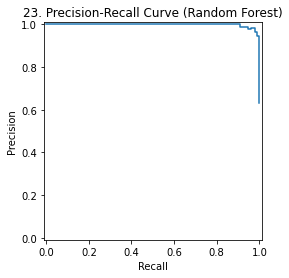

In [26]:
# 23. Train a Random Forest Classifier and plot the Precision–Recall curve.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
y_scores = rfc.predict_proba(Xc_test)[:, 1]
precision, recall, _ = precision_recall_curve(yc_test, y_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("23. Precision-Recall Curve (Random Forest)")
plt.show()


In [27]:
# 24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(max_iter=500))
    ],
    final_estimator=LogisticRegression()
)
stack_model.fit(Xc_train, yc_train)
print("24. Stacking Classifier (RF + LR) Accuracy:", accuracy_score(yc_test, stack_model.predict(Xc_test)))


24. Stacking Classifier (RF + LR) Accuracy: 0.9707602339181286


In [28]:
# 25. Train a Bagging Regressor with different bootstrap sample sizes and compare performance.
for sample_frac in [0.5, 0.7, 1.0]:
    br = BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=sample_frac, random_state=42)
    br.fit(Xr_train, yr_train)
    mse = mean_squared_error(yr_test, br.predict(Xr_test))
    print(f"25. Bootstrap Fraction = {sample_frac} -> MSE: {mse}")


25. Bootstrap Fraction = 0.5 -> MSE: 6328.8331293775445
25. Bootstrap Fraction = 0.7 -> MSE: 5677.491455681762
25. Bootstrap Fraction = 1.0 -> MSE: 6243.756669557429
